In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [2]:
#define image1 here
#define array
image1=np.array([
[150, 151, 153, 155, 156, 155, 154],
[150, 151, 153, 155, 156, 155, 154],
[150, 151, 153, 155, 156, 155, 154],
[150, 151, 153, 155, 156, 155, 154],
[150, 151, 153, 155, 156, 155, 154],
],dtype=np.uint8)



In [3]:
#code here
#first define a function for calculating histogram
##refrences used: https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html
#define function for calculate histogram .more define in report.
def calc_hist(image):
    flag = False
    h_range=(0,255)
    #hist=[0]*3
    
    hist = cv2.calcHist(image,[0], None, [256], h_range, accumulate=flag)
    return(hist)




Text(0.5, 1.0, 'histogram')

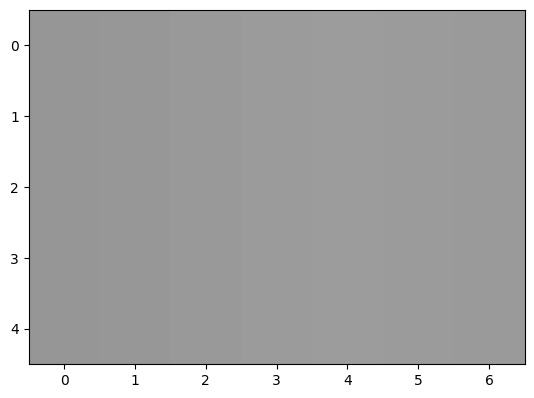

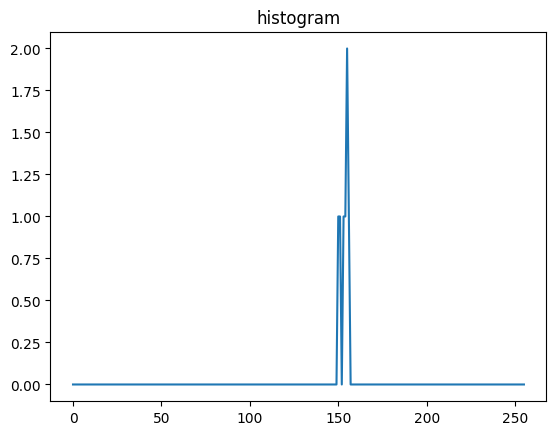

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [5]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  #save shape of input
  s=image.shape
  #define variable of formuls for compute stretch histogram
  MAX=255
  MIN=0
  fmax=0
  fmin=255
  for i in range(s[0]):
    for j in range(s[1]):
      temp=image[i][j]
      if temp < fmin:
        fmin=temp
      if fmax < temp :
        fmax = temp
  print(fmax,fmin)
  for i in range(s[0]):
    for j in range(s[1]):
      a=image[i][j]-fmin
      b=(fmax-fmin)
      c=MAX-MIN
      d=(a/b)*c + MIN
      output_image[i][j]= d
  # End
  return output_image


156 150
156 150


Text(0.5, 1.0, 'new histogram')

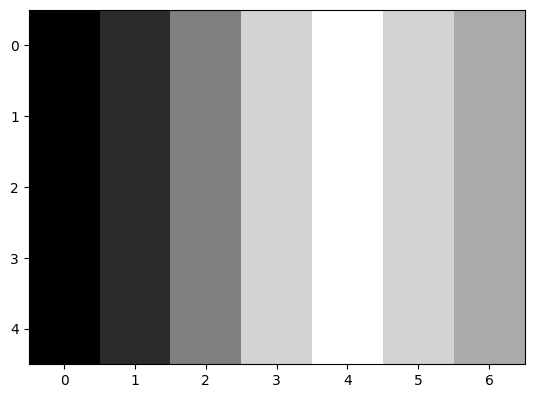

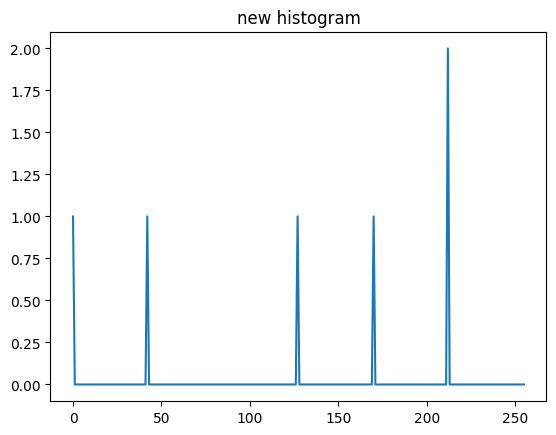

In [6]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


In [7]:
# first read the image and show it.(image2)
image_1=cv2.imread('Q3_image/image2.jpg',cv2.IMREAD_GRAYSCALE)
print(image1.shape)
cv2.imshow('image',image_1)
cv2.waitKey()


(5, 7)


-1

255 0


Text(0.5, 1.0, 'histogram')

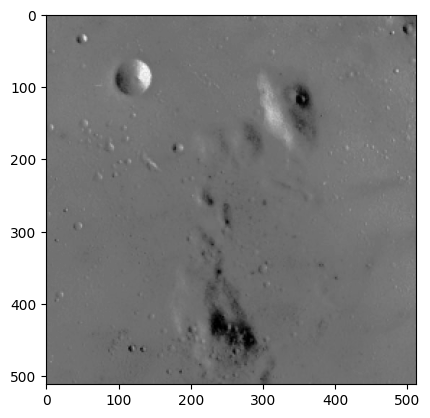

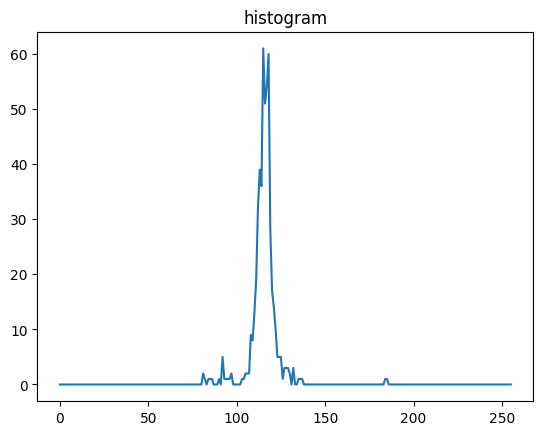

In [8]:
#use stretch function to improve quality of the image and show it
#input image to function and then plot and show finall answer histogram
outp=stretch_hist(image_1)
plt.imshow(outp,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(outp))
plt.title('histogram')


In [12]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  #we use (boresh histogram) for improve quality of image and contrast.
  # so we need threshold and and max=255 ,min =0 and ignore data (be andaze threshold az bala va paiin mahdoode)
  output_image = image.copy()
  a=image[0]
  size_outp=len(image)
  fmax=255
  fmin=0
  #calc histogram and then create stretch histogram and convert it to dicttionary
  #set min and max
  num=400
  histogram=calc_hist(image) 
  hist_file=dict(enumerate(histogram,0))
  strch_his=np.zeros(256)
  for i in hist_file:
    if hist_file[255-i] >num :
      fmax=255-i
      break
  for i in hist_file:
    if hist_file[i] >num :
      fmin=i
      break
  #calculate domain and parts for gistogram 
  #and update image with algorithm (boresh histogram)
  d=int(255/(fmax-fmin))
  for i in range(fmax-fmin+1):
    t=i+fmin
    tq=i*d
    strch_his[tq]=hist_file[t]
    for j in range(size_outp):
      for k in range(len(a)):
        if output_image[j][k] == t :
          output_image[j][k]= tq 
  return output_image


KeyboardInterrupt: 

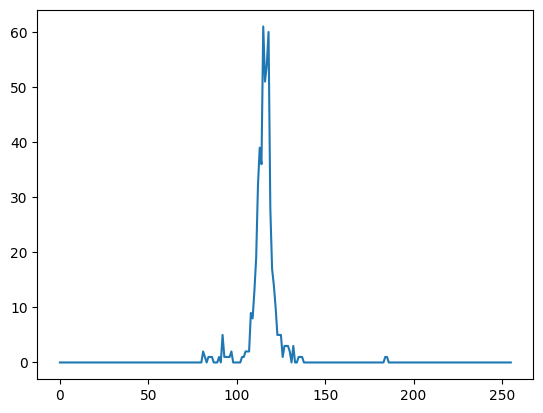

<Figure size 640x480 with 0 Axes>

In [14]:
#try your new function and show the result
tmp=modified_stretch_hist(image_1)
plt.imshow(tmp,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(tmp))






